In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [2]:
train = pd.read_csv('Train.csv')

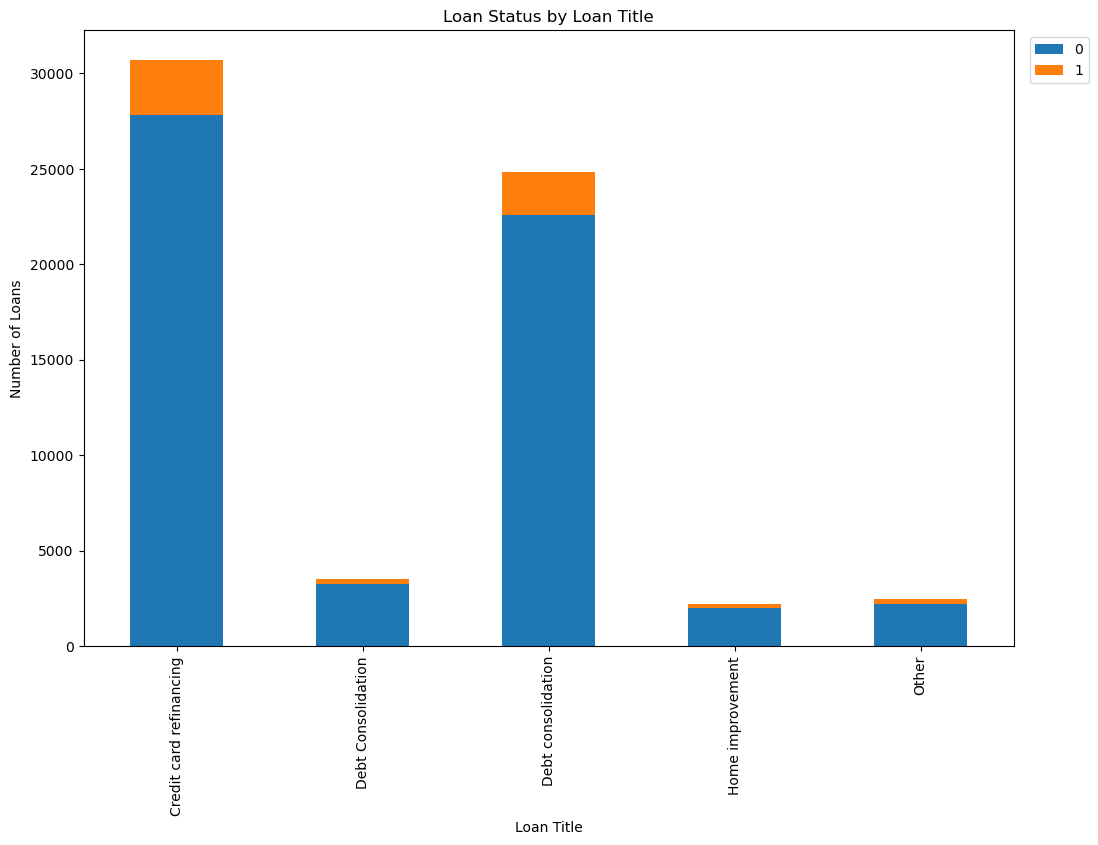

In [8]:


# Filter the data to only include the top five loan titles by frequency
top_titles = train['Loan Title'].value_counts().head(5).index
train_top_titles = train[train['Loan Title'].isin(top_titles)]

# Group the data by loan title and loan status and count the number of loans in each group
title_status_counts = train_top_titles.groupby(['Loan Title', 'Loan Status']).size().unstack()

# Plot a stacked bar chart of the loan status counts for each loan title
title_status_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add axis labels and a title
plt.xlabel('Loan Title')
plt.ylabel('Number of Loans')
plt.title('Loan Status by Loan Title')

# Add a legend outside of the plot area
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

plt.show()

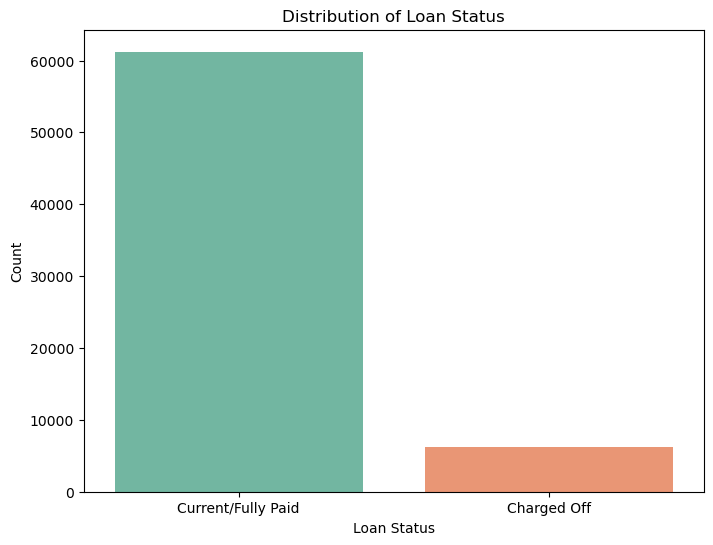

In [10]:
train['Loan Status Binary'] = train['Loan Status'].apply(lambda x: 1 if x == 1 else 0)

# Create a bar chart to show the counts of each loan status
plt.figure(figsize=(8,6))
sns.countplot(x='Loan Status Binary', data=train, palette='Set2')
plt.xticks([0,1], ['Current/Fully Paid', 'Charged Off'])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

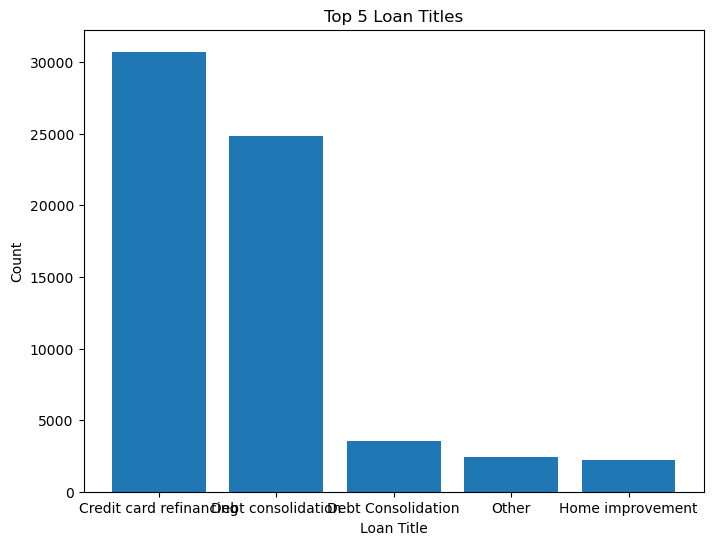

In [11]:
top_loan_titles = train['Loan Title'].value_counts().head(5)

# Create a bar chart of loan title counts
plt.figure(figsize=(8,6))
plt.bar(top_loan_titles.index, top_loan_titles.values)
plt.title('Top 5 Loan Titles')
plt.xlabel('Loan Title')
plt.ylabel('Count')
plt.show()


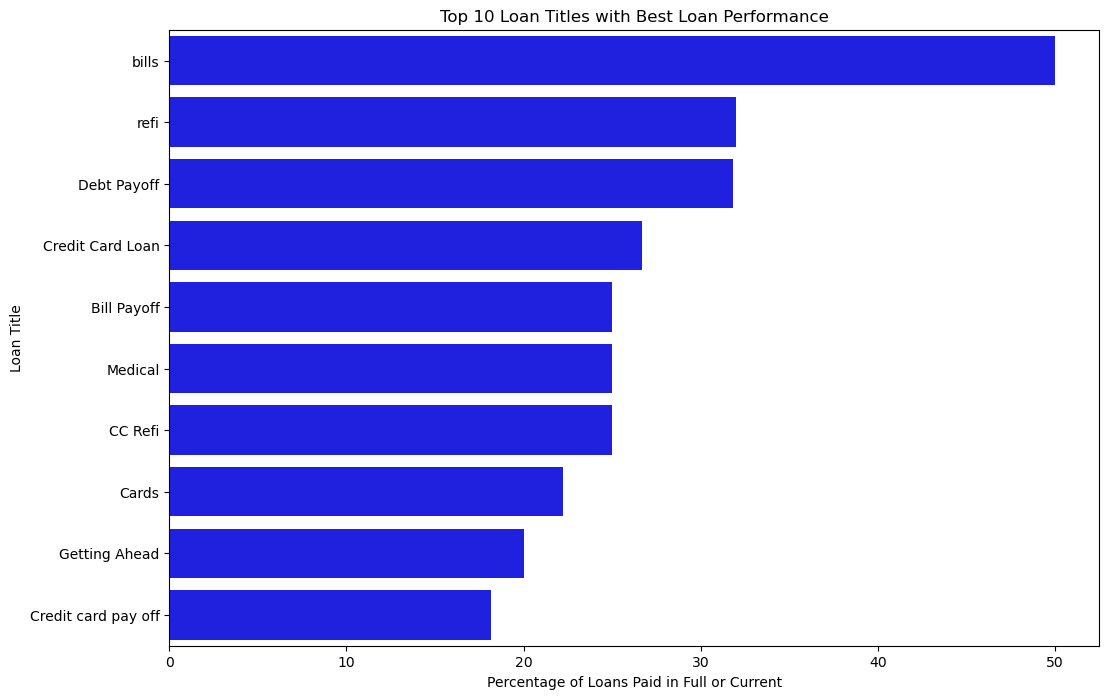

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(x='Loan Status', y=loan_title_pivot.index, data=loan_title_pivot, color='b')
plt.xlabel('Percentage of Loans Paid in Full or Current')
plt.ylabel('Loan Title')
plt.title('Top 10 Loan Titles with Best Loan Performance')
plt.show()

